In [1]:
import pandas as pd

In [2]:
df_meta = pd.read_csv('../../attribute_extraction_metadata_template/attribute_definition_top25L2_filtered_augmented_01162023.csv')

In [3]:
valid_paths = set(df_meta.category)

In [4]:
valid_l2s = set(df_meta.category.apply(lambda x: ' > '.join(x.split(' > ')[:2])))

In [5]:
len(valid_l2s)

25

# initial batches

In [120]:
df_b1_text = pd.read_json('input_batch/appen_product_attribution_batch1_text.json', lines=True)
df_b2_textimg = pd.read_json('input_batch/appen_product_attribution_batch2_text_image.json', lines=True)

In [121]:
set(df_b1_text['L2']) == set(df_b2_textimg['L2'])

True

In [122]:
valid_l2s == set(df_b1_text['L2'])

False

In [123]:
valid_l2s - set(df_b1_text['L2']), set(df_b1_text['L2']) - valid_l2s

({'Home & Garden > Kitchen,Dining & Bar'},
 {'Home & Garden > Kitchen, Dining & Bar'})

In [124]:
df_b1_text['category_path'] = df_b1_text['category_path'].apply(lambda x: x.replace('Home & Garden > Kitchen, Dining & Bar', 'Home & Garden > Kitchen,Dining & Bar'))
df_b2_textimg['category_path'] = df_b2_textimg['category_path'].apply(lambda x: x.replace('Home & Garden > Kitchen, Dining & Bar', 'Home & Garden > Kitchen,Dining & Bar'))

In [125]:
valid_l2s == set(df_b1_text['category_path'].apply(lambda x: " > ".join(x.split(" > ")[:2]))) == \
    set(df_b2_textimg['category_path'].apply(lambda x: " > ".join(x.split(" > ")[:2])))

True

In [126]:
len(df_b1_text), len(df_b2_textimg)

(124478, 74964)

In [127]:
df_b1_text_sub = df_b1_text[df_b1_text['category_path'].apply(lambda x: x in valid_paths)]
df_b2_textimg_sub = df_b2_textimg[df_b2_textimg['category_path'].apply(lambda x: x in valid_paths)]

In [128]:
len(df_b1_text_sub), len(df_b2_textimg_sub)

(106117, 64522)

In [129]:
df_b1_text_sub['sample_method'] = 'only_text'
df_b2_textimg_sub['sample_method'] = 'text_and_img'

/tmp/ipykernel_22226/3721182870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b1_text_sub['sample_method'] = 'only_text'
/tmp/ipykernel_22226/3721182870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b2_textimg_sub['sample_method'] = 'text_and_img'


In [130]:
df_b1b2_sub = pd.concat([df_b1_text_sub, df_b2_textimg_sub])

In [131]:
df_b1b2_sub = df_b1b2_sub[['category_path', 'product_id', 'title', 'product_description', 'main_image_url', 'sample_method']]

In [132]:
len(set(df_b1b2_sub['category_path'].apply(lambda x: ' > '.join(x.split(' > ')[:2]))))

25

In [133]:
valid_l2s == set(df_b1b2_sub['category_path'].apply(lambda x: ' > '.join(x.split(' > ')[:2])))

True

<AxesSubplot: ylabel='category_path'>

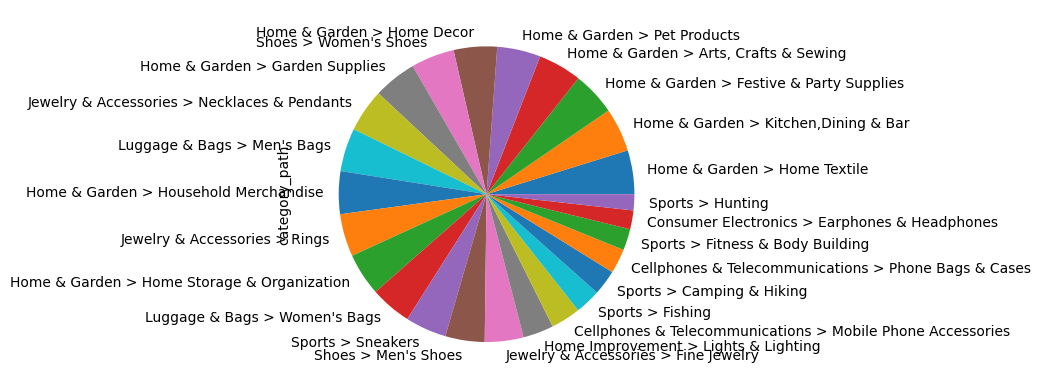

In [134]:
df_b1b2_sub['category_path'].apply(lambda x: ' > '.join(x.split(' > ')[:2])).value_counts().plot.pie()

<AxesSubplot: ylabel='sample_method'>

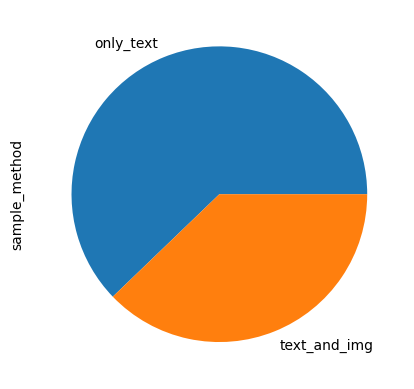

In [135]:
df_b1b2_sub.sample_method.value_counts().plot.pie()

In [136]:
df_b1b2_sub.category_path.apply(lambda x: x in valid_paths).all()

True

In [137]:
len(df_b1b2_sub) == len(set(df_b1b2_sub.product_id))

True

In [138]:
len(set(df_b1b2_sub.title + df_b1b2_sub.product_description)) / len(df_b1b2_sub)

0.9018278353717497

In [139]:
df_b1b2_sub[df_b1b2_sub.duplicated('title')].head(1).to_dict('records')

[{'category_path': 'Jewelry & Accessories > Rings',
  'product_id': '603e149c390c6907821545e5',
  'title': 'NEW SELLING Silver Daisy Ring .925 Sterling Silver Ring, 5-9',
  'product_description': "● FOUNDED IN COSTA RICA - handcrafts the best brand rings, providing jobs to artisans making good rings and raising awareness for charities. A silver ring, gold ring, or stacking rings are only the beginning.\n● 925 STERLING SILVER –These Silver rings are suitable for women or teen girls which includes your girlfriend, wife, fiancee, mother etc. You can give these as a gift for Christmas, Valentine’s Day, Mother’s Day, Prom, Hanukah, Birthday's, Anniversary, Wedding or any special private occasion\n● THE HANDMADE BE GOOD RING– Only good vibes with the good vibes brand,. Their aim was to create ring jewelry that is pura and good. Artisan fashion rings.\n● PREMIUM QUALITY: Crafted from the highest grade & authentic 925 sterling silver (precious metals), durable & hypoallergenic, Safe for Your S

In [140]:
df_b1b2_sub[df_b1b2_sub.title == 'NEW SELLING Silver Daisy Ring .925 Sterling Silver Ring, 5-9']

,category_path,product_id,title,product_description,main_image_url,sample_method
41,Jewelry & Accessories > Rings,60377592df41005e2ab51358,NEW SELLING Silver Daisy Ring .925 Sterling Si...,● FOUNDED IN COSTA RICA - handcrafts the best ...,NaN,only_text
187,Jewelry & Accessories > Rings,603e149c390c6907821545e5,NEW SELLING Silver Daisy Ring .925 Sterling Si...,● FOUNDED IN COSTA RICA - handcrafts the best ...,NaN,only_text


In [141]:
df_b1b2_sub['uniq_str'] = df_b1b2_sub['title'] + df_b1b2_sub['product_description']

In [142]:
df_b1b2_sub_uniq = df_b1b2_sub.drop_duplicates('uniq_str')

<AxesSubplot: ylabel='category_path'>

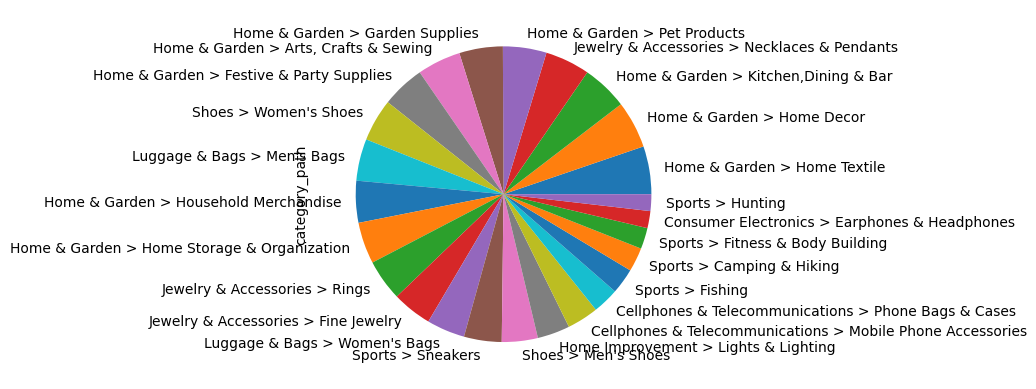

In [143]:
df_b1b2_sub_uniq['category_path'].apply(lambda x: ' > '.join(x.split(' > ')[:2])).value_counts().plot.pie()

<AxesSubplot: ylabel='sample_method'>

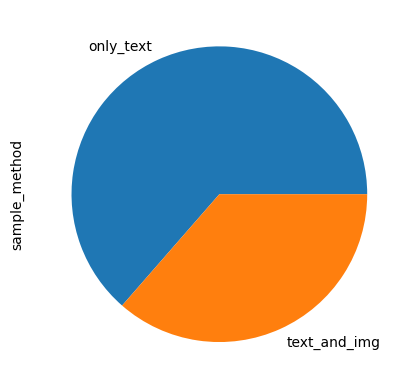

In [144]:
df_b1b2_sub_uniq.sample_method.value_counts().plot.pie()

In [145]:
df_b1b2_sub_uniq = df_b1b2_sub_uniq.sample(frac=1., random_state=43)

In [148]:
df_b1b2_sub_uniq['label_ordering'] = list(range(len(df_b1b2_sub_uniq)))

In [151]:
del df_b1b2_sub_uniq['uniq_str']

In [150]:
import numpy as np

In [153]:
b1, b2, b3 = np.array_split(df_b1b2_sub_uniq, 3)

In [156]:
b1.to_csv('input_batch_processed/appen_product_attribution_batch1.csv', index=False)
b2.to_csv('input_batch_processed/appen_product_attribution_batch2.csv', index=False)
b3.to_csv('input_batch_processed/appen_product_attribution_batch3.csv', index=False)

In [158]:
len(b1), len(b2), len(b3)

(51296, 51296, 51295)

# high impression listings

In [19]:
df_old = pd.concat([ 
    pd.read_csv('input_batch_processed/appen_product_attribution_batch1.csv'),
    pd.read_csv('input_batch_processed/appen_product_attribution_batch2.csv'),
    pd.read_csv('input_batch_processed/appen_product_attribution_batch3.csv')
])

In [20]:
df = pd.concat([
    pd.read_csv('input_batch/sdt986_high_impression_part1.csv'),
    pd.read_csv('input_batch/sdt986_high_impression_part2.csv'),
    pd.read_csv('input_batch/sdt986_high_impression_part3.csv'),
    pd.read_csv('input_batch/sdt986_high_impression_part4.csv'),
    pd.read_csv('input_batch/sdt986_high_impression_part5.csv')
])

In [21]:
df_old['split'] = 'old'
df['split'] = 'new'

In [22]:
df_cat = pd.concat([df_old, df])

In [23]:
df_cat['uniq_str'] = df_cat['title'] + df_cat['product_description']

In [31]:
df_cat = df_cat.drop_duplicates('uniq_str', keep='first').drop_duplicates('product_id', keep='first')

In [32]:
df_left = df_cat[df_cat.split == 'new']

In [33]:
len(df), len(df_left)

(25928, 25205)

In [34]:
set(df_left.product_id).intersection(df_old.product_id)

set()

In [37]:
len(df), len(df_left), len(df_old)

(25928, 25205, 153891)

In [39]:
set(df_old.sample_method)

{nan, 'only_text', 'text_and_img'}

In [40]:
max(df_old.label_ordering)

153886.0

In [41]:
df_left['sample_method'] = 'text_and_img'
df_left['label_ordering'] = list(range(153887, len(df_left) + 153887))

/tmp/ipykernel_31837/3645399324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['sample_method'] = 'text_and_img'
/tmp/ipykernel_31837/3645399324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['label_ordering'] = list(range(153887, len(df_left) + 153887))


In [43]:
df_left['category_id'] = df_left['category_id'].astype(int)

/tmp/ipykernel_31837/1272806922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['category_id'] = df_left['category_id'].astype(int)


<AxesSubplot: ylabel='category_path'>

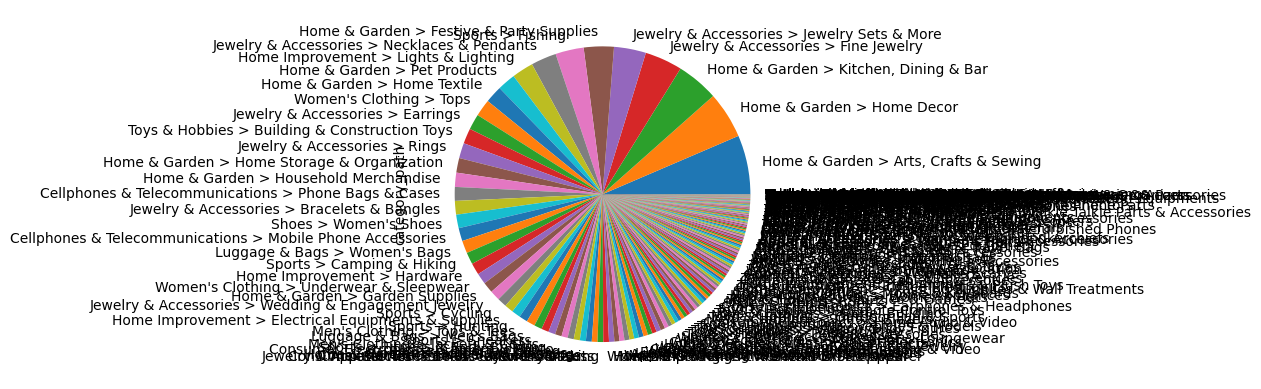

In [45]:
df_left['category_path'].apply(lambda x: ' > '.join(x.split(' > ')[:2])).value_counts().plot.pie()

In [47]:
df_left_sub = df_left[df_left['category_path'].apply(lambda x: x in valid_paths)]

In [48]:
len(df_left_sub) / len(df_left)

0.43015274747073995

In [51]:
del df_old['split']

In [53]:
df_out = df_left_sub[list(df_old)]

In [54]:
df_out.to_csv('input_batch_processed/appen_product_attribution_batch2_highimpression.csv', index=False)

# last batch

In [68]:
df_old = pd.concat([ 
    pd.read_csv('input_batch_processed/appen_product_attribution_batch1.csv'),
    pd.read_csv('input_batch_processed/appen_product_attribution_batch2.csv'),
    pd.read_csv('input_batch_processed/appen_product_attribution_batch3.csv'),
    pd.read_csv('input_batch_processed/appen_product_attribution_batch2_highimpression.csv')
])

In [69]:
df = pd.read_csv('input_batch/appen_product_attribution_batch3_text_image.csv')

In [70]:
df_old['split'] = 'old'
df['split'] = 'new'

In [71]:
df_cat = pd.concat([df_old, df])

In [72]:
df_cat['uniq_str'] = df_cat['title'] + df_cat['product_description']

In [73]:
df_cat = df_cat.drop_duplicates('uniq_str', keep='first').drop_duplicates('product_id', keep='first')

In [74]:
df_left = df_cat[df_cat.split == 'new']

In [75]:
df_left = df_left[df_left.L2.apply(lambda x: x in valid_l2s)]

In [76]:
len(df), len(df_left)

(143836, 111308)

In [77]:
df_left_sample = df_left.sample(76554, random_state=42)

In [78]:
set(df_old.sample_method)

{nan, 'only_text', 'text_and_img'}

In [79]:
df_old.label_ordering.max()

179091.0

In [80]:
df_left_sample['sample_method'] = 'text_and_img'
df_left_sample['label_ordering'] = list(range(179092, len(df_left_sample) + 179092))

In [65]:
del df_old['split']

In [82]:
df_left_sample[df_old.columns].to_csv('input_batch_processed/appen_product_attribution_batch4.csv', index=False)